Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.
Dataset Link -
https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing
Dataset columns - first three columns are userId, productId, and ratings and the fourth column is
timestamp. You can discard the timestamp column as in this case you may not need to use it.
Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has
several datasets. For this case study, we are using the Electronics dataset.
Please do the analysis based on steps( 1 to 8) as given below -
Steps -
1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,
find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the
users only who has given 50 or more number of ratings )
3. Build Popularity Recommender model.
4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
5. Build Collaborative Filtering model.
6. Evaluate the above model. ( Once the model is trained on the training data, it can be
used to compute the error (like RMSE) on predictions made on the test data.) You can
also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to
each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.
Please Note -
● If you are facing any memory issue while working on this project, create a small subset (Let’s
say 10% of data) and work on it.
● If you are stuck at the model evaluation part of this project.
Please refer to below links -
1. https://surprise.readthedocs.io/en/stable/accuracy.html
2. http://surpriselib.com/ - Getting started, example

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df=pd.read_csv("C:/Users/Sandhyash/Downloads/ratings_Electronics.csv", names=['userId','productId','ratings', 'timestamp'])
df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [32]:
df=df.drop('timestamp',axis=1)
df.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


1. There are total of 7824482 records/rows with 3 columns
2. userId and productId are of dtype 'object' and ratings dtype is 'float' 

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


.describe() gives stats inferentials (mean,median, mode) about numerical features/columns only. 
Min rating is 1 
Max rating is 5

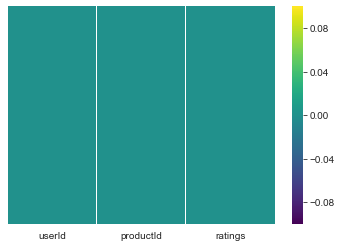

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [36]:
#or
df.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

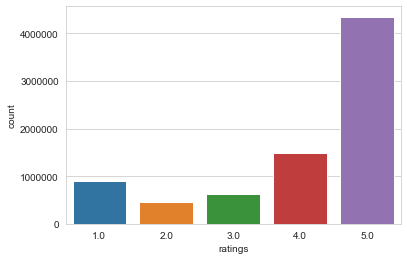

In [37]:
#To check distribution 
sns.set_style('whitegrid')
sns.countplot(df['ratings'])
#or
#df.hist(column='ratings')

2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [38]:
df['userId'].nunique()

4201696

In [39]:
df['productId'].nunique()

476002

In [41]:
user_rate=df.groupby('userId').size().sort_values(ascending=False)
user_rate.head(15)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
dtype: int64

In [43]:
user_count=df['userId'].value_counts()
df1=df[df['userId'].isin(user_count[user_count>=50].index)]
len(df1)

125871

125871 users have provided ratings for 50 and more products.

In [44]:
df1['userId'].nunique()

1540

In [45]:
df1['productId'].nunique()

48190

Create rating matrix

In [46]:
matrix=df1.pivot(index='userId', columns='productId', values='ratings').fillna(0)
matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
matrix.T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [77]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(df1, test_size=.3, random_state=0)
train_data.head()

,userId,productId,ratings
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
4738241,AB094YABX21WQ,B0056XCEAA,1.0
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [79]:
test_data.head()

,userId,productId,ratings
6730391,A3JU990UTN5RQP,B009UHO1L8,5.0
3509543,A2VJ5ALN1BIV3B,B003PNIQCI,5.0
169753,A2NQMVTQ4PVLL,B00006B7DA,4.0
7637572,A25UZ7MA72SMKM,B00FH66AW4,4.0
5490140,A680RUE1FDO8B,B006UAJ690,5.0


3. Build Popularity Recommender model. (Non-personalised)

In [82]:
user_count=train_data.groupby('productId').agg({'userId':'count'}).reset_index()
user_count.head()

,productId,userId
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [86]:
popularity_recommendation=user_count.sort_values(['userId', 'productId'], ascending=[0,1])
popularity_recommendation.head(10)

,productId,userId
30847,B0088CJT4U,133
30287,B007WTAJTO,124
19647,B003ES5ZUU,122
8752,B000N99BBC,114
30555,B00829THK0,97
30559,B00829TIEK,97
17384,B002R5AM7C,94
31107,B008DWCRQW,91
17573,B002SZEOLG,84
22744,B004CLYEDC,82


In [99]:
def recommend(userId):     
    user_recommendations = popularity_recommendation 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = userId 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols]
          
    return user_recommendations

In [102]:
# Model prediction for list of users
popularity_recommendation_model = [9,99,999,9999]   
for i in popularity_recommendation_model:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i).head())    
    print("\n") 

Here is the recommendation for the userId: 9

       userId   productId
30847       9  B0088CJT4U
30287       9  B007WTAJTO
19647       9  B003ES5ZUU
8752        9  B000N99BBC
30555       9  B00829THK0


Here is the recommendation for the userId: 99

       userId   productId
30847      99  B0088CJT4U
30287      99  B007WTAJTO
19647      99  B003ES5ZUU
8752       99  B000N99BBC
30555      99  B00829THK0


Here is the recommendation for the userId: 999

       userId   productId
30847     999  B0088CJT4U
30287     999  B007WTAJTO
19647     999  B003ES5ZUU
8752      999  B000N99BBC
30555     999  B00829THK0


Here is the recommendation for the userId: 9999

       userId   productId
30847    9999  B0088CJT4U
30287    9999  B007WTAJTO
19647    9999  B003ES5ZUU
8752     9999  B000N99BBC
30555    9999  B00829THK0




In Popularity based recommendation system same products are recommended to all the users everytime. So is the disadvantage of this model.

5. Build Collaborative Filtering model.

In [84]:
df1.shape

(125871, 3)

In [85]:
df3=pd.concat([train_data,test_data]).reset_index()
df3.head()

,index,userId,productId,ratings
0,6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
1,4738241,AB094YABX21WQ,B0056XCEAA,1.0
2,4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3,3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
4,1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [87]:
df3_matrix=df3.pivot(index='userId', columns='productId', values='ratings').fillna(0)
df3_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df3_matrix['index']=np.arange(0,df3_matrix.shape[0],1)
df3_matrix.head()
#df3_matrix.set_index['user_index']

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [89]:
df3_matrix.set_index(['index'], inplace=True)
df3_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
from scipy.sparse.linalg import svds
U, sigma, Vt=svds(df3_matrix, k=50)
sigma=np.diag(sigma)

In [93]:
rating_prediction=np.dot(np.dot(U, sigma), Vt)
preditcion_df4=pd.DataFrame(rating_prediction, columns=df3_matrix.columns)
preditcion_df4.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.003392,0.005101,0.003110,0.014036,0.004347,0.003235,0.002712,0.000683,0.014522,0.002892,...,0.000628,0.045273,0.004108,0.065339,0.004514,0.007016,0.002378,0.149812,0.056574,0.015333
1,0.002301,0.002763,0.004931,0.020029,0.009944,0.001969,0.011179,0.002130,0.010814,0.001776,...,0.000567,0.010756,0.002047,-0.011471,0.007097,-0.001310,0.003282,-0.027182,-0.011699,0.001592
2,-0.001665,-0.003039,0.002403,0.012232,0.006044,-0.002258,0.006311,0.002968,-0.004614,-0.001742,...,-0.000316,0.007457,-0.002645,-0.021967,0.016302,-0.002753,-0.000616,-0.018615,-0.011839,-0.006263
3,0.002522,0.003514,0.001841,0.007227,0.003489,0.002573,0.004060,-0.000115,0.009802,0.002169,...,0.000543,0.001348,0.002789,0.001661,-0.003795,0.000373,0.002574,-0.012402,-0.003682,0.004147
4,0.000647,0.000271,0.001764,0.011201,0.005150,0.000247,0.005291,0.001642,0.002863,0.000320,...,0.000091,0.000177,0.000035,-0.016592,0.007257,-0.001789,0.001092,-0.025153,-0.013190,-0.001824


In [107]:
# Recommend the items with the highest predicted ratings

def collabrative_model(userId, df3_matrix, preditcion_df4, recommendations):
      
    user_idx = userId-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = df3_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preditcion_df4.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    #temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userId))
    print(temp.head(recommendations))

In [108]:
#Predict 15 recommendations for the given user
userId = 199
recommendations = 15
collabrative_model(userId, df3_matrix, preditcion_df4, recommendations)


Below are the recommended items for user(user_id = 199):

            user_ratings  user_predictions
B0088CJT4U           0.0          1.313578
B000N99BBC           0.0          1.109350
B008DWCRQW           0.0          1.011367
B004CLYEDC           0.0          0.824799
B00829THK0           0.0          0.795942
B004CLYEFK           0.0          0.679933
B0034CL2ZI           0.0          0.622235
B00HFRWWAM           0.0          0.563837
B00834SJNA           0.0          0.558215
B00834SJSK           0.0          0.520207
B004T9RR6I           0.0          0.518576
B002SZEOLG           0.0          0.489802
B0079UAT0A           0.0          0.488412
B004CLYEE6           0.0          0.482208
B00ARB5FLQ           0.0          0.471209


6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [111]:
df3_matrix_mean=df3_matrix.mean()
df3_matrix_mean.head(10)

productId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
1400501520    0.003247
1400501776    0.005844
1400532620    0.003896
1400532655    0.014935
140053271X    0.003247
dtype: float64

In [112]:
preditcion_df4_mean=preditcion_df4.mean()
preditcion_df4_mean.head(10)

productId
0594451647    0.001500
0594481813    0.002123
0970407998    0.002615
0972683275    0.009778
1400501466    0.004628
1400501520    0.001375
1400501776    0.004913
1400532620    0.000851
1400532655    0.006852
140053271X    0.001219
dtype: float64

In [118]:
df5=pd.concat([df3_matrix_mean, preditcion_df4_mean], axis=1)
df5.columns=['Actual_rating_mean', 'Predictive_rating_mean']
df5.head()


,Actual_rating_mean,Predictive_rating_mean
productId,,
0594451647,0.003247,0.001500
0594481813,0.001948,0.002123
0970407998,0.003247,0.002615
0972683275,0.012338,0.009778
1400501466,0.012987,0.004628


In [136]:
RMSE= round(((((df5.Actual_rating_mean-df5.Predictive_rating_mean)**2).mean())**.5),4)
RMSE

0.0036

7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [126]:
#Predict 5 recommendations for the given user
userId = 99
recommendations = 5
collabrative_model(userId, df3_matrix, preditcion_df4, recommendations)


Below are the recommended items for user(user_id = 99):

            user_ratings  user_predictions
B007WTAJTO           0.0          0.060294
B003ES5ZUU           0.0          0.051758
B002V88HFE           0.0          0.032755
B002WE6D44           0.0          0.027403
B005FYNSPK           0.0          0.026632


8. Summarise your insights.

Popularity based recommendation system will always give same set of recommendations to all the users.
Where as Collaborative filtering system is a customised recommendation model which will always recommend products based on each user attributes